In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('overfit_data.csv')
df.head()

,X,y
0,0.002259,0.516555
1,0.003288,1.049377
2,0.005909,0.696379
3,0.008003,0.964669
4,0.010438,1.340802


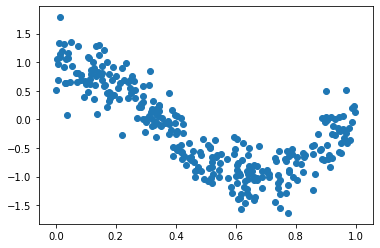

In [6]:
plt.figure()
plt.scatter(df['X'],df['y'])

## 1차회귀

In [7]:
import numpy as np
X=np.array(df['X'])
X=X.reshape((-1,1))
y=np.array(df['y'])

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

reg=LinearRegression()
kfold=KFold(n_splits=5,random_state=42)
result=cross_validate(reg, X,y, cv=kfold, scoring='neg_mean_squared_error',return_train_score=True)
result

{'fit_time': array([0.00474405, 0.0010016 , 0.0009985 , 0.00211143, 0.00199056]),
 'score_time': array([0.00132895, 0.        , 0.00135756, 0.0009973 , 0.        ]),
 'test_score': array([-0.62692293, -0.10127362, -0.38706308, -0.52331138, -2.20661409]),
 'train_score': array([-0.263634  , -0.32074028, -0.26282686, -0.24334262, -0.09965786])}

In [11]:
def calc_mse(X,y):
    reg=LinearRegression()
    kfold=KFold(n_splits=5,random_state=42)
    result=cross_validate(reg, X,y, cv=kfold, scoring='neg_mean_squared_error',return_train_score=True)
    test=result['test_score']
    train=result['train_score']
    return -test.mean(), test.std(), -train.mean()

calc_mse(X,y)

(0.7690370225149536, 0.7401374710011467, 0.23804032417558202)

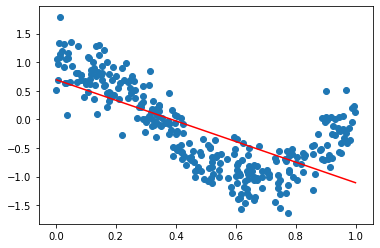

In [12]:
def graph(reg,X,y):
    reg.fit(X,y)
    y_hat=reg.predict(X)
    plt.figure()
    plt.scatter(df['X'],df['y'])
    plt.plot(X[:,0],y_hat,c='r')
    plt.show()
    
graph(reg,X,y)

## 모델에 유연성 추가하기 (2차식)

In [13]:
def polynomial(X,n):
    if n==1:
        return X
    else:
        for i in range(2,n+1):
            X=np.hstack([X,np.power(X[:,0],i).reshape(-1,1)])
    return X
#print(polynomail(X,2))

In [14]:
calc_mse(polynomial(X,2),y)

(0.6239788826472303, 0.5518351705997218, 0.10953005159614984)

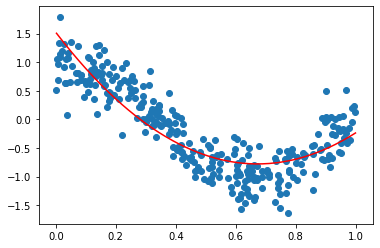

In [15]:
graph(reg,polynomial(X,2),y)

## 5차식

(1.803743219271675, 2.898438258986481, 0.0807355927364276)


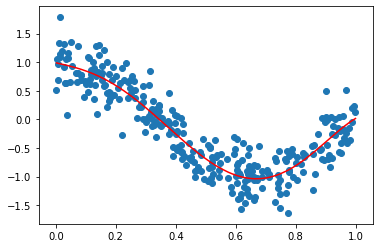

In [16]:
print(calc_mse(polynomial(X,5),y))
graph(reg,polynomial(X,5),y)

(331302747553771.6, 0.07320391353410838)


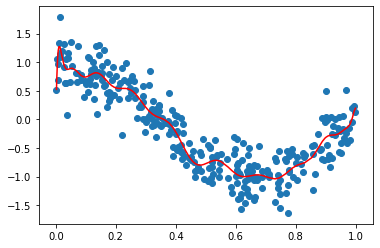

In [178]:
print(calc_mse(polynomial(X,25),y))
graph(reg,polynomial(X,25),y)

## Cross validation의 필요성

(0.7690370225149536, 0.23804032417558202)
(0.6239788826472303, 0.10953005159614984)
(0.1505781988940984, 0.08367619391152922)
(0.1688706052192496, 0.08213614999891297)
(1.803743219271675, 0.0807355927364276)


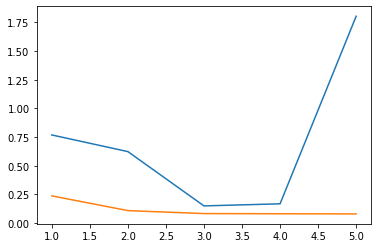

In [179]:
p=6
test_mse=[]
train_mse=[]
for i in range(1,p):
    temp=calc_mse(polynomial(X,i),y)
    print(temp)
    test_mse.append(temp[0])
    train_mse.append(temp[1])
plt.figure()
plt.plot(range(1,p),test_mse)
plt.plot(range(1,p),train_mse)

(0.1505781988940984, 0.07900504691490474, 0.08367619391152922)


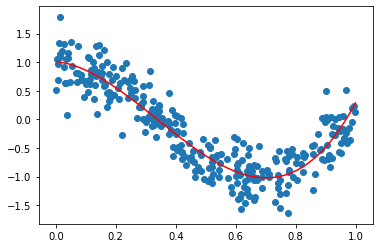

In [17]:
print(calc_mse(polynomial(X,3),y))
graph(reg,polynomial(X,3),y)

## Classification

In [18]:
import pandas as pd
df=pd.read_csv('simple_data.csv')
df.head()

,X1,X2,y
0,-2.056844,-0.752741,0
1,1.760238,1.558517,1
2,-0.447763,-1.554927,1
3,1.008459,0.529517,1
4,0.636547,0.409058,1


In [19]:
X=df[['X1','X2']]
y=df['y']

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_validate

knn=KNeighborsClassifier(n_neighbors=5)
kfold=KFold(n_splits=3, random_state=42)
cross_validate(knn, X, y, cv=kfold, scoring='accuracy',return_train_score=True)


{'fit_time': array([0.        , 0.00201631, 0.00195575]),
 'score_time': array([0.0061717 , 0.00510311, 0.00358415]),
 'test_score': array([0.82352941, 0.81818182, 0.93939394]),
 'train_score': array([0.92424242, 0.91044776, 0.91044776])}

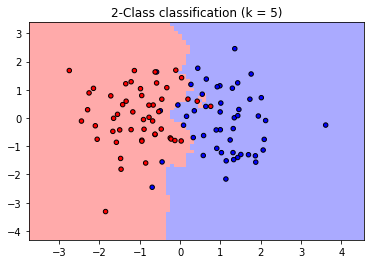

1

In [21]:
from knn_boundary import decision_boundary
knn.fit(X,y)
decision_boundary(knn,X,y)

In [22]:
def calc_acc(X,y,k,graph=True):
    knn=KNeighborsClassifier(n_neighbors=k)
    kfold=KFold(n_splits=5, random_state=42)
    result=cross_validate(knn, X, y, cv=kfold, scoring='accuracy',return_train_score=True)
    if graph:
        knn.fit(X,y)
        decision_boundary(knn,X,y)
    train=result['train_score']
    test=result['test_score']
    return test.mean(), test.std(), train.mean()

## K=1일때

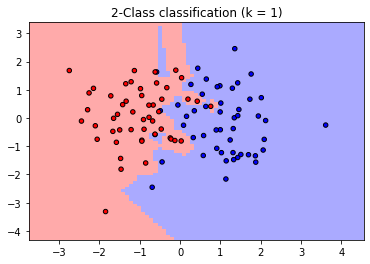

(0.86, 0.06633249580710798, 1.0)

In [23]:
calc_acc(X,y,1)

## K=10일때

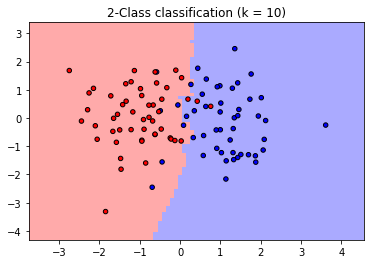

(0.8800000000000001, 0.05099019513592783, 0.9075000000000001)

In [24]:
calc_acc(X,y,10)

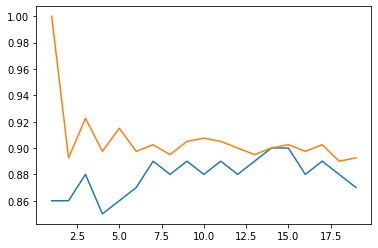

In [26]:
p=20
test_acc=[]
train_acc=[]
for i in range(1,p):
    temp=calc_acc(X,y,i,graph=False)
    test_acc.append(temp[0])
    train_acc.append(temp[2])

plt.figure()
plt.plot(range(1,p),test_acc)
plt.plot(range(1,p),train_acc)
